<a href="https://colab.research.google.com/github/KayalvizhiT513/Sine-Interpolation/blob/main/Sine_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd

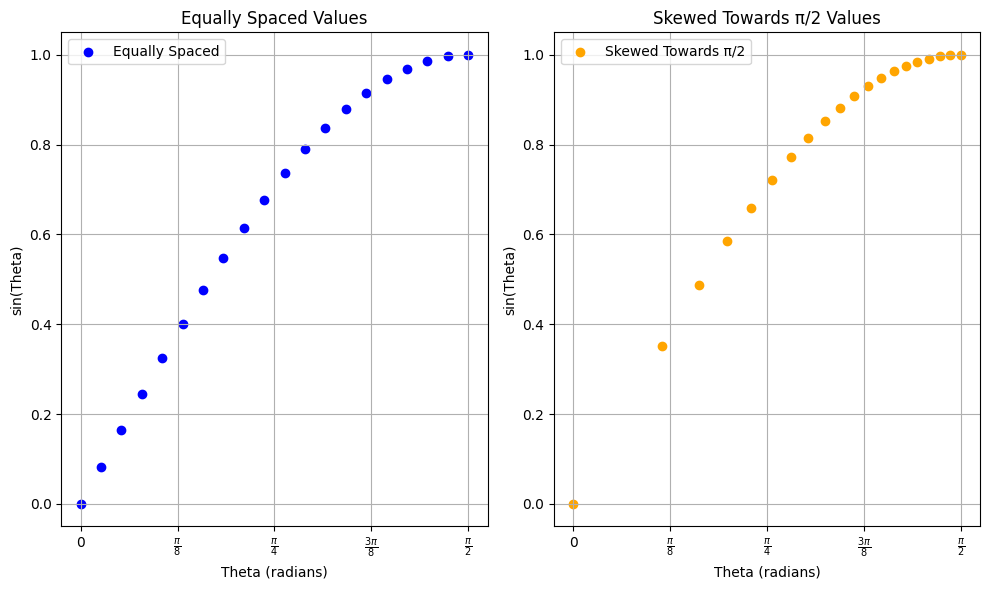

In [29]:
import matplotlib.pyplot as plt

# Parameters
num_values = 20
theta_equally_spaced = np.linspace(0, np.pi/2, num_values)  # Equally spaced
theta_skewed = np.linspace(0, 1, num_values)**(1/2) * (np.pi / 2)  # Skewed towards pi/2

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot equally spaced values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(theta_equally_spaced, np.sin(theta_equally_spaced), color='blue', label='Equally Spaced')
plt.title('Equally Spaced Values')
plt.xlabel('Theta (radians)')
plt.ylabel('sin(Theta)')
plt.xticks(np.linspace(0, np.pi/2, 5), ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$', r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$'])
plt.grid()
plt.legend()

# Plot skewed values
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(theta_skewed, np.sin(theta_skewed), color='orange', label='Skewed Towards π/2')
plt.title('Skewed Towards π/2 Values')
plt.xlabel('Theta (radians)')
plt.ylabel('sin(Theta)')
plt.xticks(np.linspace(0, np.pi/2, 5), ['0', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$', r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$'])
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [30]:
# Function to perform linear interpolation using central difference
def linear_interpolation(x, y, angle):
    neg_side = 1
    # When angle is greater than 360, find angle % 360
    if angle > 4*x[-1]:
        angle = angle%(4*x[-1])
    # When angle is negative, sin(-x) = -sin(x)
    elif angle < 0:
        angle = -1 * angle
        neg_side = -1

    # When angle between 0 and 90 degree, return sin(angle)
    if angle >= x[0] and angle <= x[-1]:
        for i in range(len(x) - 1):
            if x[i] <= angle <= x[i + 1]:
                return neg_side * (y[i] + (angle - x[i]) * (y[i + 1] - y[i]) / (x[i + 1] - x[i]))
    # When angle between 90 and 180, return sin(180 - angle)
    elif angle > x[-1] and angle <= 2*x[-1]:
        angle = 2*x[-1] - angle
        for i in range(len(x) - 1):
            if x[i] <= angle <= x[i + 1]:
                return neg_side * (y[i] + (angle - x[i]) * (y[i + 1] - y[i]) / (x[i + 1] - x[i]))
    # When angle between 180 and 270, return -sin(angle)
    elif angle > 2*x[-1] and angle <= 3*x[-1]:
        angle = angle - 2*x[-1]
        for i in range(len(x) - 1):
            if x[i] <= angle <= x[i + 1]:
                return -1 * neg_side * (y[i] + (angle - x[i]) * (y[i + 1] - y[i]) / (x[i + 1] - x[i]))
    # When angle between 180 and 360, return -sin(360 - angle)
    elif angle > 3*x[-1] and angle <= 4*x[-1]:
        angle = 4*x[-1] - angle
        for i in range(len(x) - 1):
            if x[i] <= angle <= x[i + 1]:
                return -1 * neg_side * (y[i] + (angle - x[i]) * (y[i + 1] - y[i]) / (x[i + 1] - x[i]))
    else:
        return None  # Unexpected value

In [31]:
# Function to find sine value and perform interpolation if necessary
def get_sine_value(angle, theta_equally_spaced, sine_equally_spaced, theta_skewed, sine_skewed):
    #sine_eq = linear_interpolation(theta_equally_spaced, sine_equally_spaced, angle)
    sine_skew = linear_interpolation(theta_skewed, sine_skewed, angle)
    actual_value = np.sin(angle)

    # error_eq = actual_value - sine_eq if sine_eq is not None else None
    # relative_error_eq = error_eq / actual_value if error_eq is not None and actual_value != 0 else None

    error_skew = actual_value - sine_skew if sine_skew is not None else None
    relative_error_skew = error_skew / actual_value if error_skew is not None and actual_value != 0 else None

    return {
        'Angle': angle,
        # 'Sine (Equally Spaced)': sine_eq,
        # 'Error (Equally Spaced)': error_eq,
        # 'Relative Error (Equally Spaced)': relative_error_eq,
        'Sine (Skewed)': sine_skew,
        'Error (Skewed)': error_skew,
        'Relative Error (Skewed)': relative_error_skew,
        'Actual Sine': actual_value
    }

In [32]:
# Length of lookup table
num_values = 20

In [33]:
# Generate equally distributed theta values from 0 to pi/2
theta_equally_spaced = np.linspace(0, np.pi/2, num_values)
sine_equally_spaced = np.sin(theta_equally_spaced)

# Generate skewed distribution towards pi/2
theta_skewed = np.linspace(0, 1, num_values)**(1/2) * (np.pi / 2)  # Skewed towards pi/2
sine_skewed = np.sin(theta_skewed)

In [34]:
lookup_table = pd.DataFrame({
        # 'Theta (Equally Spaced)': theta_equally_spaced,
        # 'sin(Theta) Equally Spaced': sine_equally_spaced,
        'Theta (Skewed)': theta_skewed,
        'sin(Theta) Skewed': sine_skewed
    })

In [35]:
test_angles = [0, 30, 45, 60, 90]

In [36]:
test_angles = [float(angle*np.pi/180) for angle in test_angles]

In [37]:
# Calculate results for the entered test angles
results = []
for angle in test_angles:
    result = get_sine_value(angle, theta_equally_spaced, sine_equally_spaced, theta_skewed, sine_skewed)
    results.append(result)

# Create a DataFrame for results
results_df = pd.DataFrame(results)

In [38]:
results_df

,Angle,Sine (Skewed),Error (Skewed),Relative Error (Skewed),Actual Sine
0,0.000000,0.000000,0.000000,NaN,0.000000
1,0.523599,0.499632,0.000368,0.000737,0.500000
2,0.785398,0.706647,0.000459,0.000650,0.707107
3,1.047198,0.865615,0.000410,0.000474,0.866025
4,1.570796,1.000000,0.000000,0.000000,1.000000
